# Crime data from 2011

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2011

apr11.xls*  dec11.xls*  jan11.xls*  jun11.xls*  may11.xls*  oct11.xls*
aug11.xls*  feb11.xls*  jul11.xls*  mar11.xls*  nov11.xls*  sep11.xls*


In [3]:
path = 'data/2011'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [6]:
# get premise codes

pc = pd.read_csv('data/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.head()

,Premise,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Date             0
Hour             0
Offense Type     0
Beat             0
Premise          0
Block Range      0
Street Name      0
Type             0
Suffix           0
# Of Offenses    0
dtype: int64

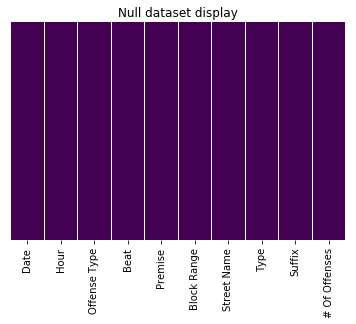

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [10]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date           127659 non-null datetime64[ns]
Hour           127659 non-null int64
OffenseType    127659 non-null object
Beat           127659 non-null object
Premise        127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
Type           127659 non-null object
Suffix         127659 non-null object
NumOffenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [11]:
df.apply(lambda x: sum(x.isnull()))

Date           0
Hour           0
OffenseType    0
Beat           0
Premise        0
BlockRange     0
StreetName     0
Type           0
Suffix         0
NumOffenses    0
dtype: int64

## Subset dataframe to work on 

In [12]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 8 columns):
Date           127659 non-null datetime64[ns]
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null int64
Hour           127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.8+ MB


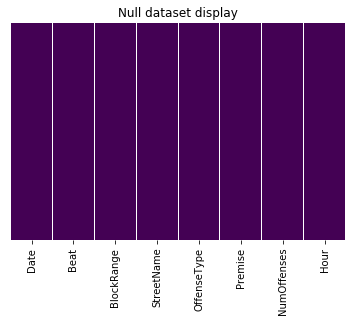

In [13]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Join datafames
 join premise df with crime to extract num values

In [14]:
crimes.Premise.value_counts(dropna=False)[:10]

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
080     6573
18O     6104
250     4686
18R     3785
18P     3557
Name: Premise, dtype: int64

In [15]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127662 entries, 0 to 127661
Data columns (total 9 columns):
Date                   127659 non-null datetime64[ns]
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127662 non-null object
NumOffenses            127659 non-null float64
Hour                   127659 non-null float64
Premise Description    127574 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.7+ MB


In [16]:
crimes[['Premise', 'Premise Description']].head(20)

,Premise,Premise Description
0,20A,APARTMENT
1,20A,APARTMENT
2,20A,APARTMENT
3,20A,APARTMENT
4,20A,APARTMENT
5,20A,APARTMENT
6,20A,APARTMENT
7,20A,APARTMENT
8,20A,APARTMENT
9,20A,APARTMENT


In [17]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2011-04-13,17E40,6400-6499,BANKSIDE,Murder,20A,1.0,1.0,APARTMENT
1,2011-04-06,20G30,2900-2999,HAYES,Murder,20A,1.0,14.0,APARTMENT
2,2011-04-17,11H20,2500-2599,BROADWAY,Murder,20A,1.0,23.0,APARTMENT
3,2011-04-21,17E10,5900-5999,BELLAIRE,Rape,20A,1.0,15.0,APARTMENT
4,2011-04-10,17E40,12500-12599,DUNLAP,Rape,20A,1.0,20.0,APARTMENT


In [18]:
crimes.apply(lambda x: sum(x.isnull()))

Date                    3
Beat                    3
BlockRange              3
StreetName              3
OffenseType             3
Premise                 0
NumOffenses             3
Hour                    3
Premise Description    88
dtype: int64

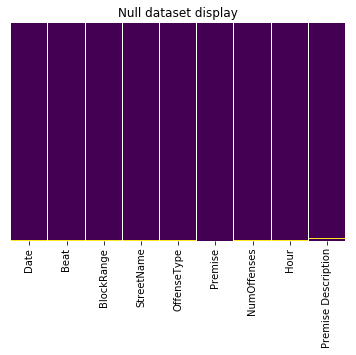

In [19]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [20]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
126699,2011-04-20,19G10,10800-10899,BEECHNUT,Auto Theft,---,1.0,18.0,NaN
126700,2011-04-15,20G30,10400-10499,RICHMOND,Theft,---,1.0,11.0,NaN
126701,2011-05-07,1A10,1200-1299,TRAVIS,Rape,---,1.0,15.0,NaN
126702,2011-05-01,20G10,9900-9999,RICHMOND,Theft,---,1.0,0.0,NaN
126703,2011-08-15,19G10,6800-6899,WEST SAM HOUSTON,Theft,---,1.0,19.0,NaN


In [21]:
len(crimes[crimes['Premise'] == '---'])

84

In [22]:
len(crimes[crimes['Premise'] == 'N'])

1

In [23]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [24]:
len(crimes[crimes['Premise Description'].isnull()])

0

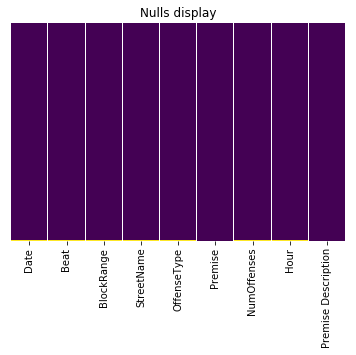

In [25]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

In [26]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   3
Beat                   3
BlockRange             3
StreetName             3
OffenseType            3
Premise                0
NumOffenses            3
Hour                   3
Premise Description    0
dtype: int64

## drop rows with 2 or 3 missing values

In [27]:
#crimes = crimes.dropna(thresh=3)
crimes = crimes.dropna(subset=['Date'])

In [28]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [29]:
crimes = crimes.dropna(thresh=3)

In [30]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

# FIND NAN

## Find NaN
- drop if > 2 nan

In [31]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [32]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Problem
- find nan values and fix

In [33]:
null_premise = crimes.Premise.isnull()

In [34]:
crimes['Premise'] = crimes["Premise"].fillna('none')
crimes['Premise Description'] = crimes["Premise Description"].fillna('none')

In [35]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

## Inspect each column

In [36]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat column
- total beats should be around 120

In [37]:
len(crimes.Beat.value_counts())

121

In [38]:
len(crimes.Beat.value_counts(dropna=False))

121

In [39]:
crimes.Beat.unique()[:10]

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50'], dtype=object)

In [40]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [41]:
len(crimes.Beat.value_counts(dropna=False))

121

In [42]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [43]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [44]:
crimes.Beat.unique()

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50', '9C40', '6B50', '17E30', '19G10', '20G70',
       '5F40', '11H50', '14D40', '19G50', '6B20', '17E20', '14D20',
       '1A20', '1A50', '5F30', '19G20', '15E40', '13D20', '6B10', '11H30',
       '6B30', '12D10', '18F40', '20G10', '12D30', '20G40', '18F30',
       '6B60', '8C10', '10H40', '14D10', '15E30', '20G60', '3B10',
       '10H10', '6B40', '13D10', '2A50', '5F20', '10H70', '10H60',
       '19G30', '10H20', '24C10', '16E30', '2A10', '4F10', '12D40',
       '10H50', '12D20', '3B30', '15E20', '19G40', '2A30', '8C20', '4F20',
       '3B40', '11H10', '8C50', '12D70', '13D40', '1A30', '7C30', '20G80',
       '16E20', '20G20', '7C10', '24C20', '14D50', '8C60', '15E10',
       '18F10', '20G50', '14D30', '24C50', '8C30', '2A20', '16E10',
       '7C50', '4F30', '12D60', '10H80', '3B50', '24C40', '7C40', '16E40',
       '10H30', '1A40', '9C30', '12D50', '24C30', '9C20', '2A40', '1A10',
       

In [45]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3029
12D10    2761
6B60     2717
3B10     2578
13D20    2390
Name: Beat, dtype: int64

## BlockRange

In [46]:
len(crimes.BlockRange.value_counts(dropna=False))

254

In [47]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1731
100-199      1638
800-899      1631
9400-9499    1603
700-799      1601
Name: BlockRange, dtype: int64

In [48]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [49]:
len(crimes.BlockRange.value_counts(dropna=False))

254

## StreetName

In [50]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7537


In [51]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [52]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7537


In [53]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer    3587
gessner       1846
gulf          1801
north         1763
richmond      1713
Name: StreetName, dtype: int64


## OffenseType
Total 7
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [54]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [55]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [56]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [57]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 68596
Burglary              27459
Auto Theft            11893
Aggravated Assault    10695
Robbery                8054
Rape                    770
Murder                  192
Name: OffenseType, dtype: int64


In [58]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [59]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [60]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 68596
Burglary              27459
Auto Theft            11893
Aggravated Assault    10695
Robbery                8054
Rape                    770
Murder                  192
Name: OffenseType, dtype: int64


## Premise

In [61]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

crimes['Premise Description'] = crimes['Premise Description'].str.strip()

crimes['Premise Description'] = crimes['Premise Description'].str.lower()

before:127


In [62]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:127


In [63]:
crimes['Premise Description'].value_counts(dropna=False).head()

apartment                17514
residence/house          17271
apartment parking lot    13946
road/street/sidewalk      8758
driveway                  7690
Name: Premise Description, dtype: int64

# Date column

In [64]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Date
- make datetime index

In [65]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [66]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1964-10-09,1A40,3700-3799,westheimer,Aggravated Assault,18O,1.0,5.0,other parking lot
1965-03-20,6B60,12400-12499,greenspoint,Theft,09H,1.0,23.0,hospital
1966-10-27,6B50,10300-10399,north,Theft,210,1.0,0.0,restaurant/cafeteria
1970-11-27,19G50,10200-10299,lands end,Theft,250,1.0,13.0,other/unknown
1971-08-16,14D20,9000-9099,brandon,Theft,20D,1.0,22.0,driveway


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [67]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [68]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1964-10-09,1A40,3700-3799,westheimer,Aggravated Assault,18O,1.0,5.0,other parking lot,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,greenspoint,Theft,09H,1.0,23.0,hospital,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,north,Theft,210,1.0,0.0,restaurant/cafeteria,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,lands end,Theft,250,1.0,13.0,other/unknown,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,brandon,Theft,20D,1.0,22.0,driveway,16,Monday,Aug,1971


In [69]:
crimes.year.value_counts(dropna=False)

2011    125777
2010      1627
2001        89
2009        40
2008        33
2007        19
2006        13
2000        12
2005         7
2004         6
2003         6
2002         5
1995         3
1999         3
1988         2
1978         2
1972         2
1981         2
1990         1
1992         1
1977         1
1976         1
1964         1
1993         1
1966         1
1965         1
1970         1
1971         1
1979         1
Name: year, dtype: int64

We can see now that many reports have incorect year

## null values

- check
- count
- display

In [70]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [71]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [72]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [73]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [74]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1964-10-09,1A40,3700-3799,westheimer,Aggravated Assault,other parking lot,1.0,5.0,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,greenspoint,Theft,hospital,1.0,23.0,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,north,Theft,restaurant/cafeteria,1.0,0.0,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,lands end,Theft,other/unknown,1.0,13.0,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,brandon,Theft,driveway,1.0,22.0,16,Monday,Aug,1971


In [75]:
crime_yr.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise Description    0
NumOffenses            0
Hour                   0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [76]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)


In [77]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1964-10-09,1A40,3700-3799,westheimer,Aggravated Assault,other parking lot,1.0,5.0,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,greenspoint,Theft,hospital,1.0,23.0,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,north,Theft,restaurant/cafeteria,1.0,0.0,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,lands end,Theft,other/unknown,1.0,13.0,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,brandon,Theft,driveway,1.0,22.0,16,Monday,Aug,1971


## Save

In [78]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 to 2011-12-31
Data columns (total 11 columns):
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null float64
Hour           127659 non-null float64
day            127659 non-null object
weekday        127659 non-null object
month          127659 non-null object
year           127659 non-null object
dtypes: float64(2), object(9)
memory usage: 11.7+ MB


In [79]:
crime_yr.to_csv('data/clean/crime11_clean.csv')

In [80]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
